# Классификация выбросов в зависимости от кластера

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_excel('./superdata.xlsx')

In [3]:
df = df[['region', 'year', 'population','pollution_static','spending','income','GRP_pc','urban','manufactory']]


In [4]:
df = df[df['year'] == 2016]
df = df.reset_index(inplace = False)

**Присоединим класс**


In [5]:
df['class'] = ''
df

,index,region,year,population,pollution_static,spending,income,GRP_pc,urban,manufactory,class
0,7,Алтайский край,2016,2366.0,213.0,2297.58,21497.0,210350.7,56.3,268898.0,
1,17,Иркутская область,2016,2409.0,642.0,14852.65,22268.0,443297.8,78.9,456100.0,
2,27,Кемеровская область,2016,2709.0,1349.0,9445.37,21263.0,316263.9,85.8,474859.0,
3,37,Красноярский край,2016,2875.0,2363.0,40007.37,28035.0,615803.9,77.2,931451.0,
4,47,Новосибирская область,2016,2780.0,201.0,3748.19,25407.0,391438.4,78.9,400622.0,
5,57,Омская область,2016,1973.0,200.0,4476.85,25241.0,316828.5,72.6,711132.0,
6,67,Республика алтай,2016,217.0,7.0,601.36,17833.0,213474.3,29.2,5946.0,
7,77,Республика бурятия,2016,984.0,94.0,3153.03,25172.0,202627.8,58.9,60832.0,
8,87,Республика тыва,2016,318.0,19.0,481.54,14111.0,164687.0,54.0,536.0,
9,97,Республика хакасия,2016,537.0,92.0,2295.62,21034.0,339586.0,69.1,79403.0,


In [6]:
class1 = ['Новосибирская область', 'Омская область', 'Республика хакасия',
 'Томская область', 'Амурская область', 'Еврейская автономная область',
 'Забайкальский край', 'Приморский край', 'Вологодская область',
 'Калининградская область', 'Новгородская область', 'Псковская область',
 'Республика карелия', 'Астраханская область', 'Волгоградская область',
 'Белгородская область', 'Брянская область', 'Владимирская область',
 'Воронежская область', 'Ивановская область', 'Калужская область',
 'Костромская область', 'Курская область', 'Липецкая область',
 'Орловская область', 'Рязанская область', 'Смоленская область',
 'Тверская область', 'Тульская область', 'Ярославская область',
 'Г севастополь', 'Кировская область', 'Оренбургская область',
 'Пензенская область', 'Саратовская область', 'Удмуртская республика',
 'Ульяновская область']
class2 = ['Иркутская область', 'Кемеровская область', 'Г. санкт-петербург',
 'Ленинградская область', 'Краснодарский край', 'Ростовская область',
 'Нижегородская область', 'Пермский край', 'Республика башкортостан',
 'Республика татарстан', 'Самарская область', 'Свердловская область',
 'Челябинская область']
class3 = ['Камчатский край', 'Магаданская область', 'Республика саха (якутия)',
 'Хабаровский край', 'Архангельская область', 'Мурманская область',
 'Республика коми']
class4 = ['Алтайский край', 'Республика бурятия', 'Республика тыва',
 'Кабардино-балкарская республика', 'Карачаево-черкесская республика',
 'Республика адыгея', 'Республика дагестан', 'Республика ингушетия',
 'Республика калмыкия', 'Республика северная осетия – алания',
 'Ставропольский край', 'Чеченская республика', 'Тамбовская область',
 'Республика марий эл', 'Республика мордовия', 'Чувашская республика',
 'Курганская область', 'Республика крым']




In [7]:
df['class'][df['region'].isin(class1)] = 1
df['class'][df['region'].isin(class2)] = 2
df['class'][df['region'].isin(class3)] = 3
df['class'][df['region'].isin(class4)] = 4

C:\Users\Anastasia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Anastasia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Anastasia\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel 

In [8]:
df['class'][df['class'] == ''] = 0

C:\Users\Anastasia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [9]:
df['class'].value_counts().sum()

82

In [10]:
unlabeled = df[df['class'] == 0]

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [13]:
train = df[df['class'] != 0]
train

,index,region,year,population,pollution_static,spending,income,GRP_pc,urban,manufactory,class
0,7,Алтайский край,2016,2366.0,213.0,2297.58,21497.0,210350.7,56.3,268898.0,4
1,17,Иркутская область,2016,2409.0,642.0,14852.65,22268.0,443297.8,78.9,456100.0,2
2,27,Кемеровская область,2016,2709.0,1349.0,9445.37,21263.0,316263.9,85.8,474859.0,2
4,47,Новосибирская область,2016,2780.0,201.0,3748.19,25407.0,391438.4,78.9,400622.0,1
5,57,Омская область,2016,1973.0,200.0,4476.85,25241.0,316828.5,72.6,711132.0,1
7,77,Республика бурятия,2016,984.0,94.0,3153.03,25172.0,202627.8,58.9,60832.0,4
8,87,Республика тыва,2016,318.0,19.0,481.54,14111.0,164687.0,54.0,536.0,4
9,97,Республика хакасия,2016,537.0,92.0,2295.62,21034.0,339586.0,69.1,79403.0,1
10,107,Томская область,2016,1079.0,301.0,7601.49,24326.0,451823.9,72.3,158609.0,1
11,117,Амурская область,2016,802.0,135.0,1821.06,29661.0,357829.0,67.3,26777.0,1


In [14]:
X, y = train.drop(['region','year','class'], axis = 1), train['class']

In [15]:
y=y.astype('int')

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [18]:
tree = DecisionTreeClassifier(random_state= 1)

In [19]:
tree_param = {'criterion':['gini','entropy'],'max_depth':[1,2,3,4,5,6,7], 'max_features': list(range(1,7))}

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
grid = GridSearchCV(tree,tree_param, cv = 5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=1, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7],
       

In [22]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

# Оценим модель  с позиции accuracy

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

# function for fitting trees of various depths on the training data using cross-validation
def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
    cv_scores_list = []
    cv_scores_std = []
    cv_scores_mean = []
    accuracy_scores = []
    for depth in tree_depths:
        tree_model = DecisionTreeClassifier(max_depth=depth)
        cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
        cv_scores_list.append(cv_scores)
        cv_scores_mean.append(cv_scores.mean())
        cv_scores_std.append(cv_scores.std())
        accuracy_scores.append(tree_model.fit(X, y).score(X, y))
    cv_scores_mean = np.array(cv_scores_mean)
    cv_scores_std = np.array(cv_scores_std)
    accuracy_scores = np.array(accuracy_scores)
    return cv_scores_mean, cv_scores_std, accuracy_scores
  
# function for plotting cross-validation results
def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
    fig, ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
    ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
    ylim = plt.ylim()
    ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Tree depth', fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_ylim(ylim)
    ax.set_xticks(depths)
    ax.legend()



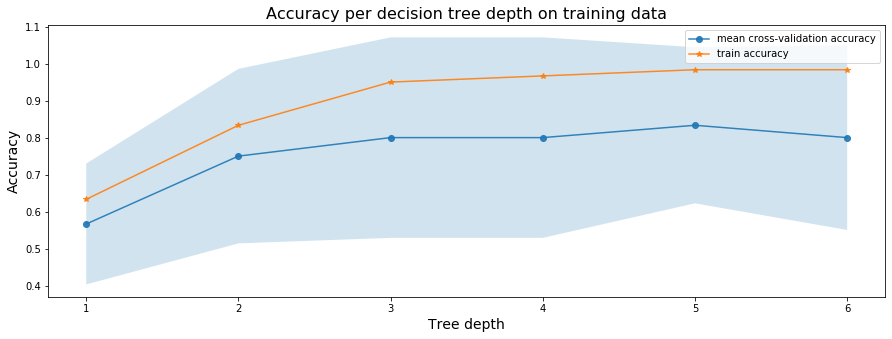

In [24]:
# fitting trees of depth 1 to 7
sm_tree_depths = range(1,7)
sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# plotting accuracy
plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
                               'Accuracy per decision tree depth on training data')
plt.savefig('crossplot.png')

In [25]:
idx_max = sm_cv_scores_mean.argmax()
sm_best_tree_depth = sm_tree_depths[idx_max]
sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
      sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))


The depth-5 tree achieves the best mean cross-validation accuracy 83.33333 +/- 10.54093% on training dataset


In [26]:
def run_single_tree(X_train, y_train, X_test, y_test, depth):
    model = DecisionTreeClassifier(max_depth=4).fit(X_train, y_train)
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Single tree depth: ', 4)
    print('Accuracy, Training Set: ', round(accuracy_train*100,5), '%')
    print('Accuracy, Test Set: ', round(accuracy_test*100,5), '%')
    return accuracy_train, accuracy_test
  

# train and evaluate a 5-depth tree
sm_best_tree_accuracy_train, sm_best_tree_accuracy_test = run_single_tree(X_train, y_train, 
                                                                          X_test, y_test, 
                                                                          sm_best_tree_depth)

Single tree depth:  4
Accuracy, Training Set:  96.66667 %
Accuracy, Test Set:  93.33333 %


In [ ]:
params  = grid.cv_results_['params']
mean_test_score =  grid.cv_results_['mean_test_score']
rank = grid.cv_results_['rank_test_score']

In [ ]:
params = pd.DataFrame(params)

In [ ]:
mean_test_score  = pd.Series(mean_test_score)
rank = pd.Series(rank)

In [ ]:
mm = pd.DataFrame({'mean_test_scores':mean_test_score, 'rank':rank})

In [ ]:
frame = [params, mm]

In [ ]:
cross_val_data = pd.concat(frame, axis = 1)

In [ ]:
cross_val = cross_val_data.sort_values('mean_test_scores',ascending = False, ignore_index = True)

In [ ]:
cross_val.to_excel('crossval.xlsx')

# Cross validation table for different number of features 

In [89]:
tree = DecisionTreeClassifier(criterion = 'gini', max_depth=4, max_features=4, random_state= 6)
tree.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=4, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6, splitter='best')

In [90]:
dtree_predictions = tree.predict(X_test) 

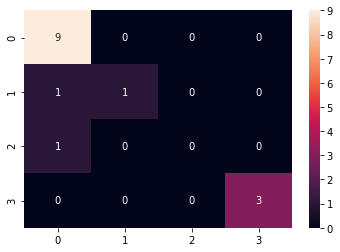

In [91]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, dtree_predictions) 
sns.heatmap(cm,annot = True)
plt.savefig('confusionmatrix.png')

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,dtree_predictions)

0.8666666666666667

In [93]:
new = df[df['class'] == 0]
xnew = new.drop(['region','year','class'], axis = 1)


In [94]:
xnew

,index,population,pollution_static,spending,income,GRP_pc,urban,manufactory
3,37,2875.0,2363.0,40007.37,28035.0,615803.9,77.2,931451.0
6,67,217.0,7.0,601.36,17833.0,213474.3,29.2,5946.0
18,187,487.0,77.0,3557.85,49601.0,1575642.6,81.8,55040.0
20,207,50.0,21.0,711.01,65679.0,1323201.3,70.0,803.0
48,487,12381.0,63.0,39667.25,59205.0,1157373.0,98.8,4723032.0
54,547,7423.0,253.0,11408.61,40539.0,483683.3,81.7,2126307.0
79,797,3660.0,2292.0,57133.54,41312.0,1627945.9,80.4,1408583.0


In [107]:
newpred = tree.predict(xnew)

In [109]:
tree.classes_

array([1, 2, 3, 4])

In [102]:
labe = df['region'][df['class'] == 0]

In [104]:
pd.DataFrame(data = newpred, index = labe).to_excel('finalpred.xlsx')


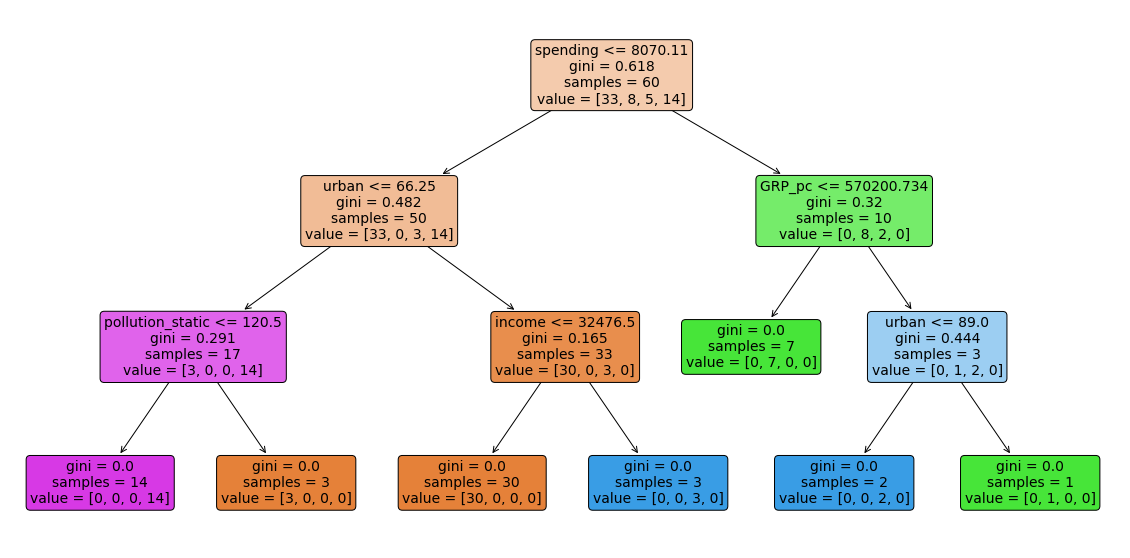

<Figure size 432x288 with 0 Axes>

In [81]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(tree,feature_names=X.columns, filled=True, rounded=True)
plt.show()
plt.savefig('tress33.png')


4

In [ ]:
# Используем тест на неизвестной выборке 

In [82]:
tree_imp = tree.feature_importances_


In [106]:
ftree_imp = pd.Series(tree_imp,index=X.columns).sort_values(ascending=False)
ftree_imp

urban               0.405866
spending            0.263612
income              0.147023
pollution_static    0.133185
GRP_pc              0.050314
manufactory         0.000000
population          0.000000
index               0.000000
dtype: float64

No handles with labels found to put in legend.


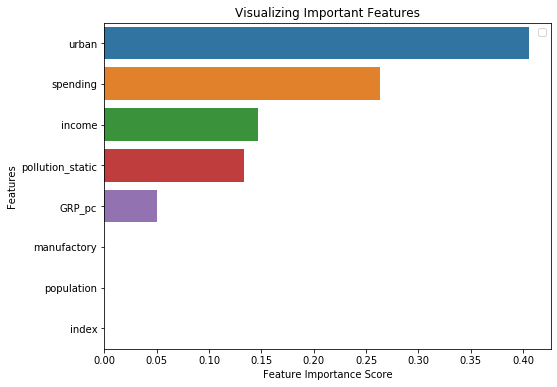

<Figure size 432x288 with 0 Axes>

In [105]:
plt.figure(figsize=(8,6))
sns.barplot(x=ftree_imp, y=ftree_imp.index)
# Add labels to your graph

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()
plt.savefig('importances.png')

In [116]:
df['region']

0                          Алтайский край
1                       Иркутская область
2                     Кемеровская область
3                       Красноярский край
4                   Новосибирская область
5                          Омская область
6                        Республика алтай
7                      Республика бурятия
8                         Республика тыва
9                      Республика хакасия
10                        Томская область
11                       Амурская область
12           Еврейская автономная область
13                     Забайкальский край
14                        Камчатский край
15                    Магаданская область
16                        Приморский край
17               Республика саха (якутия)
18                    Сахалинская область
19                       Хабаровский край
20             Чукотский автономный округ
21                  Архангельская область
22                    Вологодская область
23                     Г. санкт-пе

# Тестим другие алгоритмы

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
forest = RandomForestClassifier()
forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [113]:
fpred = forest.predict(X_test)

In [114]:
accuracy_score(y_test,fpred)

0.9333333333333333

In [117]:
forest.predict(xnew)

array([2, 4, 3, 3, 2, 2, 2])

In [120]:
forest_imp = pd.Series(forest.feature_importances_,index=X.columns).sort_values(ascending=False)
ftree_imp

urban               0.405866
spending            0.263612
income              0.147023
pollution_static    0.133185
GRP_pc              0.050314
manufactory         0.000000
population          0.000000
index               0.000000
dtype: float64

In [121]:
from sklearn.ensemble import BaggingClassifier

In [123]:
bag = BaggingClassifier()
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [124]:
accuracy_score(y_test, bag.predict(X_test))

0.9333333333333333

In [125]:
bag.predict(xnew)

array([2, 4, 3, 3, 2, 2, 2])

In [130]:
from xgboost import XGBClassifier
boost = XGBClassifier()

In [131]:
boost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [132]:
accuracy_score(y_test,boost.predict(X_test))

1.0

In [133]:
boost.predict(xnew)

array([2, 4, 3, 3, 2, 2, 2])